# Assignment 2: Classification and Evaluation (20 marks)

Student Name: `Tianhong Wang`

Student ID: `1436415`

## General info

<b>Due date</b>: *5 pm on Friday 7th of April*

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2;</li>
    <li>two days late, -4;</li>
    <li>three days late, -6;</li>
    <li>four days late, -8;</li>
    <li>five days late, -10;</li>
</ul>

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, -2.0
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, -1.0
</UL>


## Overview:
For this assignment, you will work with a provided dataset to train and utilize multiple classifiers to analyze different versions of the dataset. In addition to implementing these classifiers, you will also explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. Finally, you will be expected to answer some conceptual questions based on your observations and analysis.

## Data Set:
In this assignment, you will work with multiple versions of one dataset called "Amphibians." It is adopted from a famous public dataset, and you can find more details about it <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>.  The dataset includes information about five groups of amphibians in Poland: "Green frogs," "Brown frogs," "Common toad," "Tree frog," and "Fire-bellied toad." The dataset comprises 14 attributes and one class. Some of these attributes are numeric, some are categorical, and some are ordinal.

You can find details about all the features in the dataset in the file "README.txt".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1 [5 marks]
**Q1.1 A.** Read the dataset "amphibians1.csv" dataset into a pandas DataFrame called `data1`. Create a function called `encode` that takes in the features of the dataset as a pandas DataFrame and uses one-hot encoding to convert all nominal (and ordinal) attributes to numeric. You can achieve this by either using `get_dummies()` from the pandas library or `OneHotEncoder()` from the scikit-learn library. **[1 mark]**

**B.** For 10 rounds, use `train_test_split` to divide the encoded `data1` into 70% train, 30% test . Set the `random_state` equal to the loop counter. For example in the loop
``` python 
for i in range(10):
```
make `random_state` equal to `i`. 
Use the splitted datasets to train and test the following models (use the default hyperparameters): **[1 mark]**
- Zero-R
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Bernoulli Naive Bayes model

Report the average accuracy over the 10 runs.

In [4]:
data1 = pd.read_csv("amphibians1.csv")

y1 = data1.iloc[:, -1]
X1 = data1.iloc[:, :-1]


In [13]:
# preprocessing 
def encode(X):
    # your code here
    X = pd.get_dummies(X, columns=['TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR','RR', 'BR', 'MR', 'CR'])
    
    return X
encoded = encode(X1)

In [166]:
ZeroR_Acc_1 = []
GNB_Acc_1 = []
MNB_Acc_1 = []
BNB_Acc_1 = []

# your code here

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(encoded, y1, train_size = 0.7, test_size = 0.3, random_state=i, stratify = y1)
    zero_r = DummyClassifier(strategy = "most_frequent")
    zero_r.fit(x_train, y_train)
    zero_r_score = zero_r.score(x_test, y_test)
    ZeroR_Acc_1.append(zero_r_score)
    
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(x_train, y_train)
    gaussian_nb_score = gaussian_nb.score(x_test, y_test)
    GNB_Acc_1.append(gaussian_nb_score)
    
    mult_nb =MultinomialNB()
    mult_nb.fit(x_train, y_train)
    mult_nb_score = mult_nb.score(x_test, y_test)
    MNB_Acc_1.append(mult_nb_score)
    
    bern_nb = BernoulliNB()
    bern_nb.fit(x_train, y_train)
    bern_nb_score = bern_nb.score(x_test, y_test)
    BNB_Acc_1.append(bern_nb_score)


print("Accuracy of ZeroR:", np.mean(ZeroR_Acc_1).round(2))
print("Accuracy of GNB:", np.mean(GNB_Acc_1).round(2))
print("Accuracy of MNB:", np.mean(MNB_Acc_1).round(2))
print("Accuracy of BNB:", np.mean(BNB_Acc_1).round(2))


Accuracy of ZeroR: 0.57
Accuracy of GNB: 0.43
Accuracy of MNB: 0.33
Accuracy of BNB: 0.59


**Q1.2** After comparing the performance of the different models on the classification task, please comment on any differences or lack of differences you observe between the models. **[3 marks]**</br>
*NOTE: You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [152]:
x_train, x_test, y_train, y_test = train_test_split(encoded, y1, train_size = 0.7, test_size = 0.3, random_state=0, stratify = y1)
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(x_train, y_train)
zero_r_pred = zero_r.predict(x_test)
zr_report = classification_report(y_test, zero_r_pred, zero_division = 0)
print("Zero_R report:\n" + zr_report)

gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)
gaussian_pred = gaussian_nb.predict(x_test)
gau_report = classification_report(y_test, gaussian_pred, zero_division = 0)
print("Gaussian NB report:\n" + gau_report)

mult_nb =MultinomialNB()
mult_nb.fit(x_train, y_train)
mult_nb_pred = mult_nb.predict(x_test)
mult_report = classification_report(y_test, mult_nb_pred, zero_division = 0)
print("Multinomial NB report:\n" + mult_report)

bern_nb = BernoulliNB()
bern_nb.fit(x_train, y_train)
bern_nb_pred = bern_nb.predict(x_test)
bern_report = classification_report(y_test, bern_nb_pred, zero_division = 0)
print("Bernoulli NB report:\n" + bern_report)

Zero_R report:
                   precision    recall  f1-score   support

       Brown frog       0.00      0.00      0.00        19
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.57      1.00      0.73        31
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.57        54
        macro avg       0.11      0.20      0.15        54
     weighted avg       0.33      0.57      0.42        54

Gaussian NB report:
                   precision    recall  f1-score   support

       Brown frog       0.53      0.47      0.50        19
      Common toad       0.50      0.50      0.50         2
Fire-bellied toad       0.33      1.00      0.50         1
       Green frog       0.76      0.61      0.68        31
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.56        54
        macro av

*Answer Here*
Firstly, there exists significant differences of accuracy between these four models. Bernoulli Naive Bayes model's accuracy is 0.59 which is the highest. This is mainly due to Bernoulli NB model's data most fits the distribution, and it is the most balanced. As Bernoulli model only has two kinds of values which is 0 or 1, a high accuracy could support that Bernoulli model's data also fits well with the distribution instead of has significant overfitiing, outliers. We can conclude that choosing Bernoulli NB model is the most appropirate. Secondly, the ZeroR Bayes model is 0.57 which is also excellent. However,the accuracy of Gaussian Naive Bayes model and Multinomial Naive Bayes model is very low which is 0.43 and 0.33 both below than 0.5. We can conclude that these two models' data do not fit well with the corresponding distribution, which is unblanced or biased. Several reasons may affect the low accuracy, such as there is too many irrelevant, noisy or unbaised data. Overfitting could also lead to a low accuracy. 

Secondly, by analyzing the performance metrics of these four models, we can get some conclusions. Zero_R model has the least macro-average precision, weighted average precision, macro-average f1-score and the second least weighted-average score. This is mainly due to Zero_R model only predicts about the "Green frog" instead of other frog classes. Hence, it has a high accuracy about f1-score which is 0.57 but there exists low values about the other metrics.Gaussian NB model has valid values about four classes. It has some high scores on "Green frog" class. Multinomial Naive Bayes model and Bernoulli Naive Bayes model have valid values on three classes. They both not predict about "Fire-bellied toad" therefore they have some relative high score about macro-averaged precision/recall/f1-score and weighted-average precision/recall/f1-score. Multinomial Naive Bayes model has the least accuracy and relative low macro-averaged f1-score. If this model be tunned perfectly, I belive the printed final accuracy will be better. 

## Question 2 [5 marks]

**Q2.1.** Divide the `data1` into 70% train and 30% test splits for 10 rounds, set the `random_state` equal to the loop counter. Then, train and test **K-Nearest Neighbor algorithms (with K values of 1, 5, and 20)**, using Euclidean distance as the distance metric and maximum vote (no weighting) to determine the label. Finally, report the average accuracy of the KNN models over the 10 runs. **[1 mark]**

In [153]:
KNN1_Acc_1 = []
KNN5_Acc_1 = []
KNN20_Acc_1 = []

# your code here

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(encoded, y1, train_size = 0.7, test_size = 0.3, random_state=i, stratify = y1)
    neigh1 = KNeighborsClassifier(n_neighbors = 1)
    neigh1.fit(x_train, y_train)
    neigh1_pred = neigh1.predict(x_test)
    knn1_accuracy = accuracy_score(y_test, neigh1_pred)
    KNN1_Acc_1.append(knn1_accuracy)
    
    neigh5 = KNeighborsClassifier(n_neighbors = 5)
    neigh5.fit(x_train, y_train)
    neigh5_pred = neigh5.predict(x_test)
    knn5_accuracy = accuracy_score(y_test, neigh5_pred)
    KNN5_Acc_1.append(knn5_accuracy)
    
    neigh20 = KNeighborsClassifier(n_neighbors = 20)
    neigh20.fit(x_train, y_train)
    neigh20_pred = neigh20.predict(x_test)
    knn20_accuracy = accuracy_score(y_test, neigh20_pred)
    KNN20_Acc_1.append(knn20_accuracy)


print("Accuracy of KNN(1):", np.mean(KNN1_Acc_1).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_1).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_1).round(2))


Accuracy of KNN(1): 0.56
Accuracy of KNN(5): 0.61
Accuracy of KNN(20): 0.65


**Q2.2.A.** Create a function called `normalise` that takes the features of the dataset as a pandas DataFrame and scales all numeric attributes to the range of 0-1. You can either use `MinMaxScaler` from the `sklearn.preprocessing` library or implement the normalization step yourself.
**B.** For 10 rounds divide the normalised "data1" into 70% train and 30% test splits using set the `random_state` equal to the loop counter, and run the KNN models (k=1,5 and 20). Report the average accuracy of your KNN models over these 10 runs. **[1 mark]**

In [23]:
# preprocessing 
def normalise(X):
    # your code here
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X
#print(normalise(X1))

[[0.00837814 0.         0.28571429 ... 0.1        0.         0.        ]
 [0.0021258  0.         0.28571429 ... 0.1        0.         0.        ]
 [0.00337627 0.         0.28571429 ... 0.         0.         0.        ]
 ...
 [0.0058772  0.         0.         ... 0.5        0.         0.        ]
 [0.00337627 0.         0.78571429 ... 0.         0.         0.        ]
 [0.00337627 0.         0.78571429 ... 0.1        0.         0.        ]]


In [159]:
######################################## POSSIBLE SOLUTION #############################################

KNN1_Acc_2 = []
KNN5_Acc_2 = []
KNN20_Acc_2 = []

# your code here

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(normalise(encoded), y1,train_size = 0.7, test_size = 0.3, random_state=i, stratify = y1)
    neigh1 = KNeighborsClassifier(n_neighbors = 1)
    neigh1.fit(x_train, y_train)
    neigh1_pred = neigh1.predict(x_test)
    knn1_accuracy = accuracy_score(y_test, neigh1_pred)
    KNN1_Acc_2.append(knn1_accuracy)
    
    neigh5 = KNeighborsClassifier(n_neighbors = 5)
    neigh5.fit(x_train, y_train)
    neigh5_pred = neigh5.predict(x_test)
    knn5_accuracy = accuracy_score(y_test, neigh5_pred)
    KNN5_Acc_2.append(knn5_accuracy)
    
    neigh20 = KNeighborsClassifier(n_neighbors = 20)
    neigh20.fit(x_train, y_train)
    neigh20_pred = neigh20.predict(x_test)
    knn20_accuracy = accuracy_score(y_test, neigh20_pred)
    KNN20_Acc_2.append(knn20_accuracy)


print("Accuracy of KNN(1):", np.mean(KNN1_Acc_2).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_2).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_2).round(2))


Accuracy of KNN(1): 0.52
Accuracy of KNN(5): 0.58
Accuracy of KNN(20): 0.62


**Q2.3** Compare the results of the KNN models (for each value of K) in Q2.1 and Q2.2, and discuss any differences you observe. Did the preprocessing step in Q2.2 improve the performance of the KNN models? Why or why not? **[3 marks]**

*Answer Here*
The normalised preprocessing step does not improve the performance of the KNN models as the accuracy of KNN(1) drops from 0.56 to 0.52, KNN(5) declines from 0.61 to 0.58, KNN(20) decreases from 0.65 to 0.62. Firstly, by analyzing the data of Q2.1 and Q2.2 accuracy, we can discover that as both the K values increase, the accuracy rises as well. This is mainly because a larger K value let the model capture more neighbors therefore it reduces the noise or outliers to improve the accuracy. The reason of why normalized dataset does not improve the performance of the KNN models is mainly due to "SR" values. Before normalising the data, there is a significant difference among "SR" values, the smallest value is 30, the largest is 30000 which gives two outliers. It gives a high variance or high standard deviation value. Hence, the accuracy mainly depends on "SR" values rather than other columns values. After normalising, it does a calculation between each value and overall min, max value therefore refelecting the data into the range [0,1] which gives a smaller standard Euclidean distance among values and reduces the variance, standard deviation and the gap. Hence, normalised KNN model becomes less dependent on "SR" values then become more dependent on other column values. If other columns values has relative more outliers, noises, higher variance or higher standard deviation, it can make the model accuracy decreased. Hence, the other several columns values affect the overall accuracy more than before, it may give a lower accuracy of normalised KNN model.  

## Question 3 [5 marks]

**Q3.1.** Read the "amphibians2.csv" into `data2` and  "amphibians1.csv" into `data1_2`. Observe any differences in the values of the feature "SR" between these two datasets, and explain why you think these changes were made (provide your hypothesis). Use diagrams such a histograms or boxplots to check the distribution of the feature 'SR' before and after the change. **[2 marks]**

In [27]:
data2 = pd.read_csv("amphibians2.csv")
data1_2 = pd.read_csv("amphibians1.csv")

data1_2_mean:4682.666666666667
data1_2_median:700.0
data1_2_min:30
data2_mean:3159.3142857142857
data2_median:600.0
data2_min:30


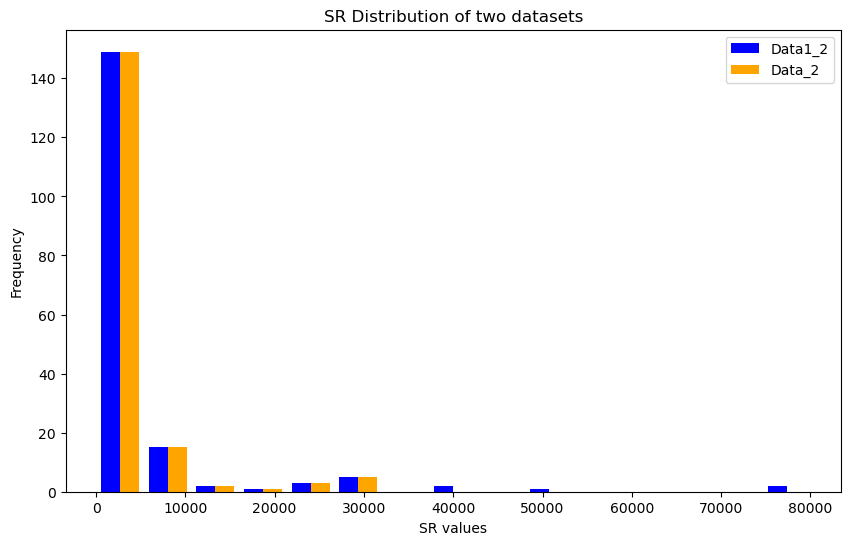

In [160]:
# your code here
data2_SR = data2['SR']
data1_2_SR = data1_2['SR']

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10, 6))

axs.hist([data1_2_SR, data2_SR], bins=15, color=['blue', 'orange'], label=['Data1_2', 'Data_2'])
axs.set_title('SR Distribution of two datasets')
axs.set_xlabel('SR values')
axs.set_ylabel('Frequency')

data1_2_mean = data1_2_SR.mean()
data1_2_median = data1_2_SR.median()
data1_2_min = data1_2_SR.min()
data2_mean = data2_SR.mean()
data2_median = data2_SR.median()
data2_min = data2_SR.min()

print("data1_2_mean:" + str(data1_2_mean))
print("data1_2_median:" + str(data1_2_median))
print("data1_2_min:" + str(data2_min))
print("data2_mean:" + str(data2_mean))
print("data2_median:" + str(data2_median))
print("data2_min:" + str(data2_min))

axs.legend()

*Answer Here*
By analyzing the histogram and two datasets' mean and median value, we can conclude that both data2 and data1_2 "SR" values is a right-skewed distribution. This is because both mean value of each dataset is larger than median value and it is to the right of each median value. Hence, we can judge that it is a right-skewed distribution. Also, after changing, we can observe a significant difference is that data2's max value is 30000 smaller than data1_2's max value which is 80000. Furthermore, as they have the same min value 30, data2's "SR" values will have a smaller variance and standard deviation. As the max value decreases to 30000, the right tail of distribution will become shorter for data2. As the max values decrease, data2's mean and median values also decrease.

**Q3.2** 
For 10 rounds plit the `data2` and `data1_2` dataset into 70% training and 30% testing sets use the `random_state` equal to the loop counter. Train and test two **decision tree** classifier with all default hyper-parameters: one with `data1_2` and one with `data2`. Calculate and report the average accuracy of both models for 10 runs. **[1 mark]**

In [36]:
y1_2 = data1_2.iloc[:, -1]
X1_2 =  data1_2.iloc[:, :-1]

y2 = data2.iloc[:, -1]
X2 = data2.iloc[:, :-1]


In [161]:
DT_Acc_1_2 = []
DT_Acc_2 = []

# your code here
from sklearn.tree import DecisionTreeClassifier
for i in range(10): 
    x_train, x_test, y_train, y_test = train_test_split(X1_2, y1_2, train_size = 0.7,test_size=0.3, random_state = i, stratify = y1_2)
    dt_clf_1_2 = DecisionTreeClassifier()
    dt_clf_1_2.fit(x_train, y_train)
    dt_1_2_pred = dt_clf_1_2.predict(x_test)
    dt_1_2_accuracy = accuracy_score(y_test,dt_1_2_pred)
    
    DT_Acc_1_2.append(dt_1_2_accuracy)
    
    x_train, x_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.7,test_size=0.3, random_state = i, stratify = y2)
    dt_clf_2 = DecisionTreeClassifier()
    dt_clf_2.fit(x_train, y_train)
    dt_2_pred = dt_clf_2.predict(x_test)
    dt_acc_2_accuracy = accuracy_score(y_test, dt_2_pred)
    
    DT_Acc_2.append(dt_acc_2_accuracy)
    

print("Accuracy of Decision Tree \tdata1_2:", np.mean(DT_Acc_1_2).round(2),"\tdata2:", np.mean(DT_Acc_2).round(2))

Accuracy of Decision Tree 	data1_2: 0.5 	data2: 0.54


**Q3.3** Compare and analyze the performance of the **decision tree** classifier on `data1_2` and `data2`. Discuss any differences or similarities that you observe in the performance of these models. Does the change made to the dataset improve the performance of the model? Explain why or why not and elaborate on your hypothesis from Q3.1. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [162]:

x_train, x_test, y_train, y_test = train_test_split(X1_2, y1_2, train_size = 0.7, test_size=0.3, random_state = 0, stratify = y1_2)
dt_clf_1_2 = DecisionTreeClassifier()
dt_clf_1_2.fit(x_train, y_train)
dt_1_2_pred = dt_clf_1_2.predict(x_test)
print("Data1_2 Report :\n", classification_report(y_test, dt_1_2_pred, zero_division = 0))

x_train, x_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.7, test_size=0.3, random_state = 0, stratify = y2)
dt_clf_2 = DecisionTreeClassifier()
dt_clf_2.fit(x_train, y_train)
dt_2_pred = dt_clf_2.predict(x_test)
print("Data2 report :\n", classification_report(y_test, dt_2_pred, zero_division = 0))

Data1_2 Report :
                    precision    recall  f1-score   support

       Brown frog       0.56      0.47      0.51        19
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.72      0.68      0.70        31
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.56        54
        macro avg       0.26      0.23      0.24        54
     weighted avg       0.61      0.56      0.58        54

Data2 report :
                    precision    recall  f1-score   support

       Brown frog       0.62      0.53      0.57        19
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.71      0.73      0.72        30
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.60        53
        macro avg

*Answer Here*
The change made to the dataset helps to improve the performance of model as the accuracy of decision tree increases from 0.5 to 0.54. By combining Q3.1's hypothesis, we can conclude that a smaller mean and median value, a shorter tail of right-skewed distribution is helpful to improve the accuracy. This is mainly because that a shorter tail means a smaller outlier range and more appropritae distribution shape, then it helps the decision tree predict more accuractely as the negative factors of input values become less.
By analyzing two datasets' metrics report, we can observe that both datasets has no valid values of precision, recall , f1-score value on "Common toad", "Fire-bellied toad" and "Tree frog" class as the support values is few which is both 2,1,1. For "Brown frog" class, data2 has a better score of precision, recall and f1-score. The macro-averaged precision/recall/f1-score and weight-averaged precision/recall/f1-score of data2 is better than before, but the improvement is not very obvious. Overall, by analyzing two dataset's deatiled metrics report, it can support better that the change made to datasets helps to improve the performance as these score for each class or metrics is getting better.   

## Question 4

**Q4.1** Read the "amphibians3.csv" into data3. Use histogram diagrams to compare the distribution of class labels between `data1` and `data3`. Observe the changes on the distribution of the class labels and explain in your own words why you think these changes have been made.**[2 marks]**

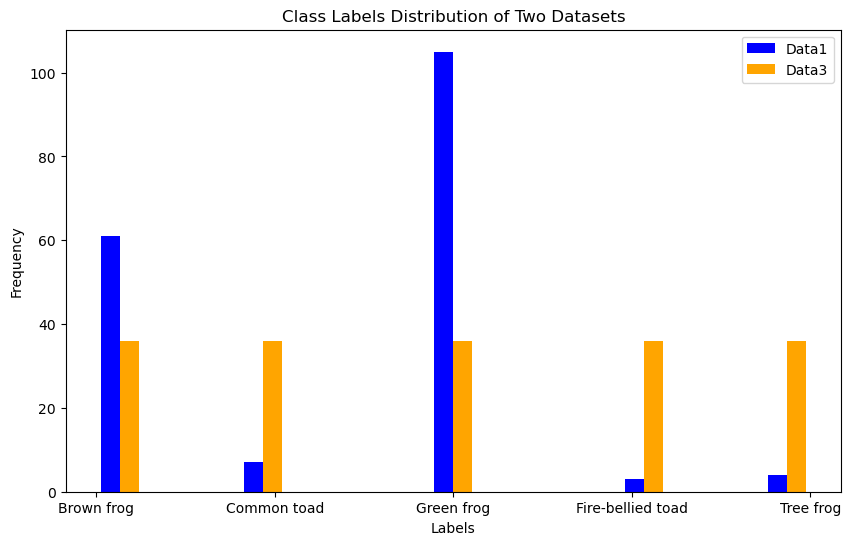

In [163]:
data3 = pd.read_csv("amphibians3.csv")

# your code here

y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([y1, y3], bins=15, color=['blue', 'orange'], label=['Data1', 'Data3'])
axs.set_title('Class Labels Distribution of Two Datasets')
axs.set_ylabel('Frequency')
axs.set_xlabel('Labels')
axs.legend()


Answer: By comparing data1 and data3's class labels, the distribution shapes changes from bimodal distribution to uniform distribution. Because data1 histogram has two significant peaks on "Brown frog" class and "Green frog" class, then data3 histogram ilustrates that each class label have the same counts without clear peaks. Therefore, the probability of choosing a label among five classes is equal.

**Q4.2** Use the same encoding technique as used in Q1.1 to encode the `data3` dataset and apply the same normalization technique as used in Q2.1 to normalise the data. For 10 rounds, split the encoded and normalized data3 into 70% training and 30% testing sets,  set the `random_state` equal to the loop counter. Train and test the following models using `data3`: **[1 mark]**
- Zero-R
- K-Nearest Neighbour (K = 1, 5 and 20) 

Calculate the average accuracy of the models for 10 runs and report the results.


In [44]:
y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

In [167]:
ZeroR_Acc_3 = []
KNN1_Acc_3 = []
KNN5_Acc_3 = []
KNN20_Acc_3 = []

# your code here

encoded3 = encode(X3)
normalize3 = normalise(encoded3)

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(normalize3, y3, train_size = 0.7, test_size = 0.3, random_state=i, stratify = y3)
    zero_r = DummyClassifier(strategy = "most_frequent")
    zero_r.fit(x_train, y_train)
    zero_r_pred = zero_r.predict(x_test)
    zero_r_score = accuracy_score(y_test, zero_r_pred)
    
    ZeroR_Acc_3.append(zero_r_score)
    
    neigh1 = KNeighborsClassifier(n_neighbors = 1)
    neigh1.fit(x_train, y_train)
    neigh1_pred = neigh1.predict(x_test)
    knn1_accuracy = accuracy_score(y_test, neigh1_pred)
    KNN1_Acc_3.append(knn1_accuracy)
    
    neigh5 = KNeighborsClassifier(n_neighbors = 5)
    neigh5.fit(x_train, y_train)
    neigh5_pred = neigh5.predict(x_test)
    knn5_accuracy = accuracy_score(y_test, neigh5_pred)
    KNN5_Acc_3.append(knn5_accuracy)

    neigh20 = KNeighborsClassifier(n_neighbors = 20)
    neigh20.fit(x_train, y_train)
    neigh20_pred = neigh20.predict(x_test)
    knn20_accuracy = accuracy_score(y_test, neigh20_pred)
    KNN20_Acc_3.append(knn20_accuracy)




print("Accuracy of ZeroR: \tdata1:", np.mean(ZeroR_Acc_1).round(2),"\tdata3:",np.mean(ZeroR_Acc_3).round(2))
print("Accuracy of KNN(1): \tdata1:", np.mean(KNN1_Acc_2).round(2),"\tdata3:", np.mean(KNN1_Acc_3).round(2))
print("Accuracy of KNN(5): \tdata1:", np.mean(KNN5_Acc_2).round(2),"\tdata3:", np.mean(KNN5_Acc_3).round(2))
print("Accuracy of KNN(20): \tdata1:", np.mean(KNN20_Acc_2).round(2),"\tdata3:", np.mean(KNN20_Acc_3).round(2))

Accuracy of ZeroR: 	data1: 0.57 	data3: 0.2
Accuracy of KNN(1): 	data1: 0.52 	data3: 0.77
Accuracy of KNN(5): 	data1: 0.58 	data3: 0.69
Accuracy of KNN(20): 	data1: 0.62 	data3: 0.51


**Q4.3** Discuss any differences you observe between the results of these KNN classifiers on data1 (Q2.2) and data3. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.* 

In [165]:
x_train, x_test, y_train, y_test = train_test_split(normalize3, y3,train_size = 0.7, test_size = 0.3, random_state=i, stratify = y3)
zero_r = DummyClassifier()
zero_r.fit(x_train, y_train)
zero_r_pred = zero_r.predict(x_test)
zr_report = classification_report(y_test, zero_r_pred, zero_division = 0)
print("ZeroR report:\n", zr_report)

neigh1 = KNeighborsClassifier(n_neighbors = 1)
neigh1.fit(x_train, y_train)
neigh1_pred = neigh1.predict(x_test)
knn1_report = classification_report(y_test, neigh1_pred, zero_division = 0)
print("KNN1 report:\n", knn1_report)

neigh5 = KNeighborsClassifier(n_neighbors = 5)
neigh5.fit(x_train, y_train)
neigh5_pred = neigh5.predict(x_test)
knn5_report = classification_report(y_test, neigh5_pred, zero_division = 0)
print("KNN5 report:\n", knn5_report)

neigh20 = KNeighborsClassifier(n_neighbors = 20)
neigh20.fit(x_train, y_train)
neigh20_pred = neigh20.predict(x_test)
knn20_report = classification_report(y_test, neigh20_pred, zero_division = 0)
print("KNN20 report:\n", knn20_report)

ZeroR report:
                    precision    recall  f1-score   support

       Brown frog       0.20      1.00      0.34        11
      Common toad       0.00      0.00      0.00        11
Fire-bellied toad       0.00      0.00      0.00        11
       Green frog       0.00      0.00      0.00        11
        Tree frog       0.00      0.00      0.00        10

         accuracy                           0.20        54
        macro avg       0.04      0.20      0.07        54
     weighted avg       0.04      0.20      0.07        54

KNN1 report:
                    precision    recall  f1-score   support

       Brown frog       0.44      0.36      0.40        11
      Common toad       0.90      0.82      0.86        11
Fire-bellied toad       0.79      1.00      0.88        11
       Green frog       0.50      0.45      0.48        11
        Tree frog       0.91      1.00      0.95        10

         accuracy                           0.72        54
        macro avg     

*Answer Here*
Zero_R accuracy significantly decreases from 0.57 to 0.2, this is mainly due to the class labels distribution of two datasets are different, one is bimodal distribution another is uniform distribution. As the ZeroR model is only affected by the distribution of the dataset, hence, uniform distribution will result in a low accuracy as it does not have clear peak. 
KNN(1) and KNN(5) accuracy increases from 0.52 to 0.77, 0.58 to 0.69. This rise means that a changing distribution is helpful for data3 KNN classifier. However, a larger K value does not improve the accuracy. For data3 model, if K changes to 5, accuracy drops from 0.77 to 0.69 for data3 KNN classifier. This is mainly due to a larger K provides a kind of danger of grouping together unrelated classes or noises, even overfitting. KNN(20) decreases from 0.62 to 0.51 this is also related about previous K values. When K=1 and K=5 on data3 result, it has showed a decline trend, then a declined trend for K=20 is reasonable. We can conclude that the most appropirate K value is not between 5 and 20, it's between 1 and 5 as there's a rising trend. 

By analyzing the metrics report, we can observe that support calue for each class is similar which corresponds to the uniform distribution shape. ZeroR has the best recall score for "Brown frog". KNN1 and KNN5 both has the best precision and f1-score of "Tree frog" class. KNN20 has the best precision of "Green frog" class.

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Tianhong Wang]
   
   <b>Dated</b>: [11/04/2023]